In [1]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error
boston = fetch_california_housing()

In [2]:
print(boston.data.shape)

(20640, 8)


In [3]:
print(boston.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [4]:
print(boston.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [5]:
print(boston.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
data = boston.data

In [7]:
type(data)

numpy.ndarray

In [8]:
data.shape

(20640, 8)

In [9]:
data= pd.DataFrame(data = data , columns = boston.feature_names)

In [10]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
data['Price'] = boston.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Understand your data 

In [12]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [14]:
data.isnull()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False


## Data Visualiztion

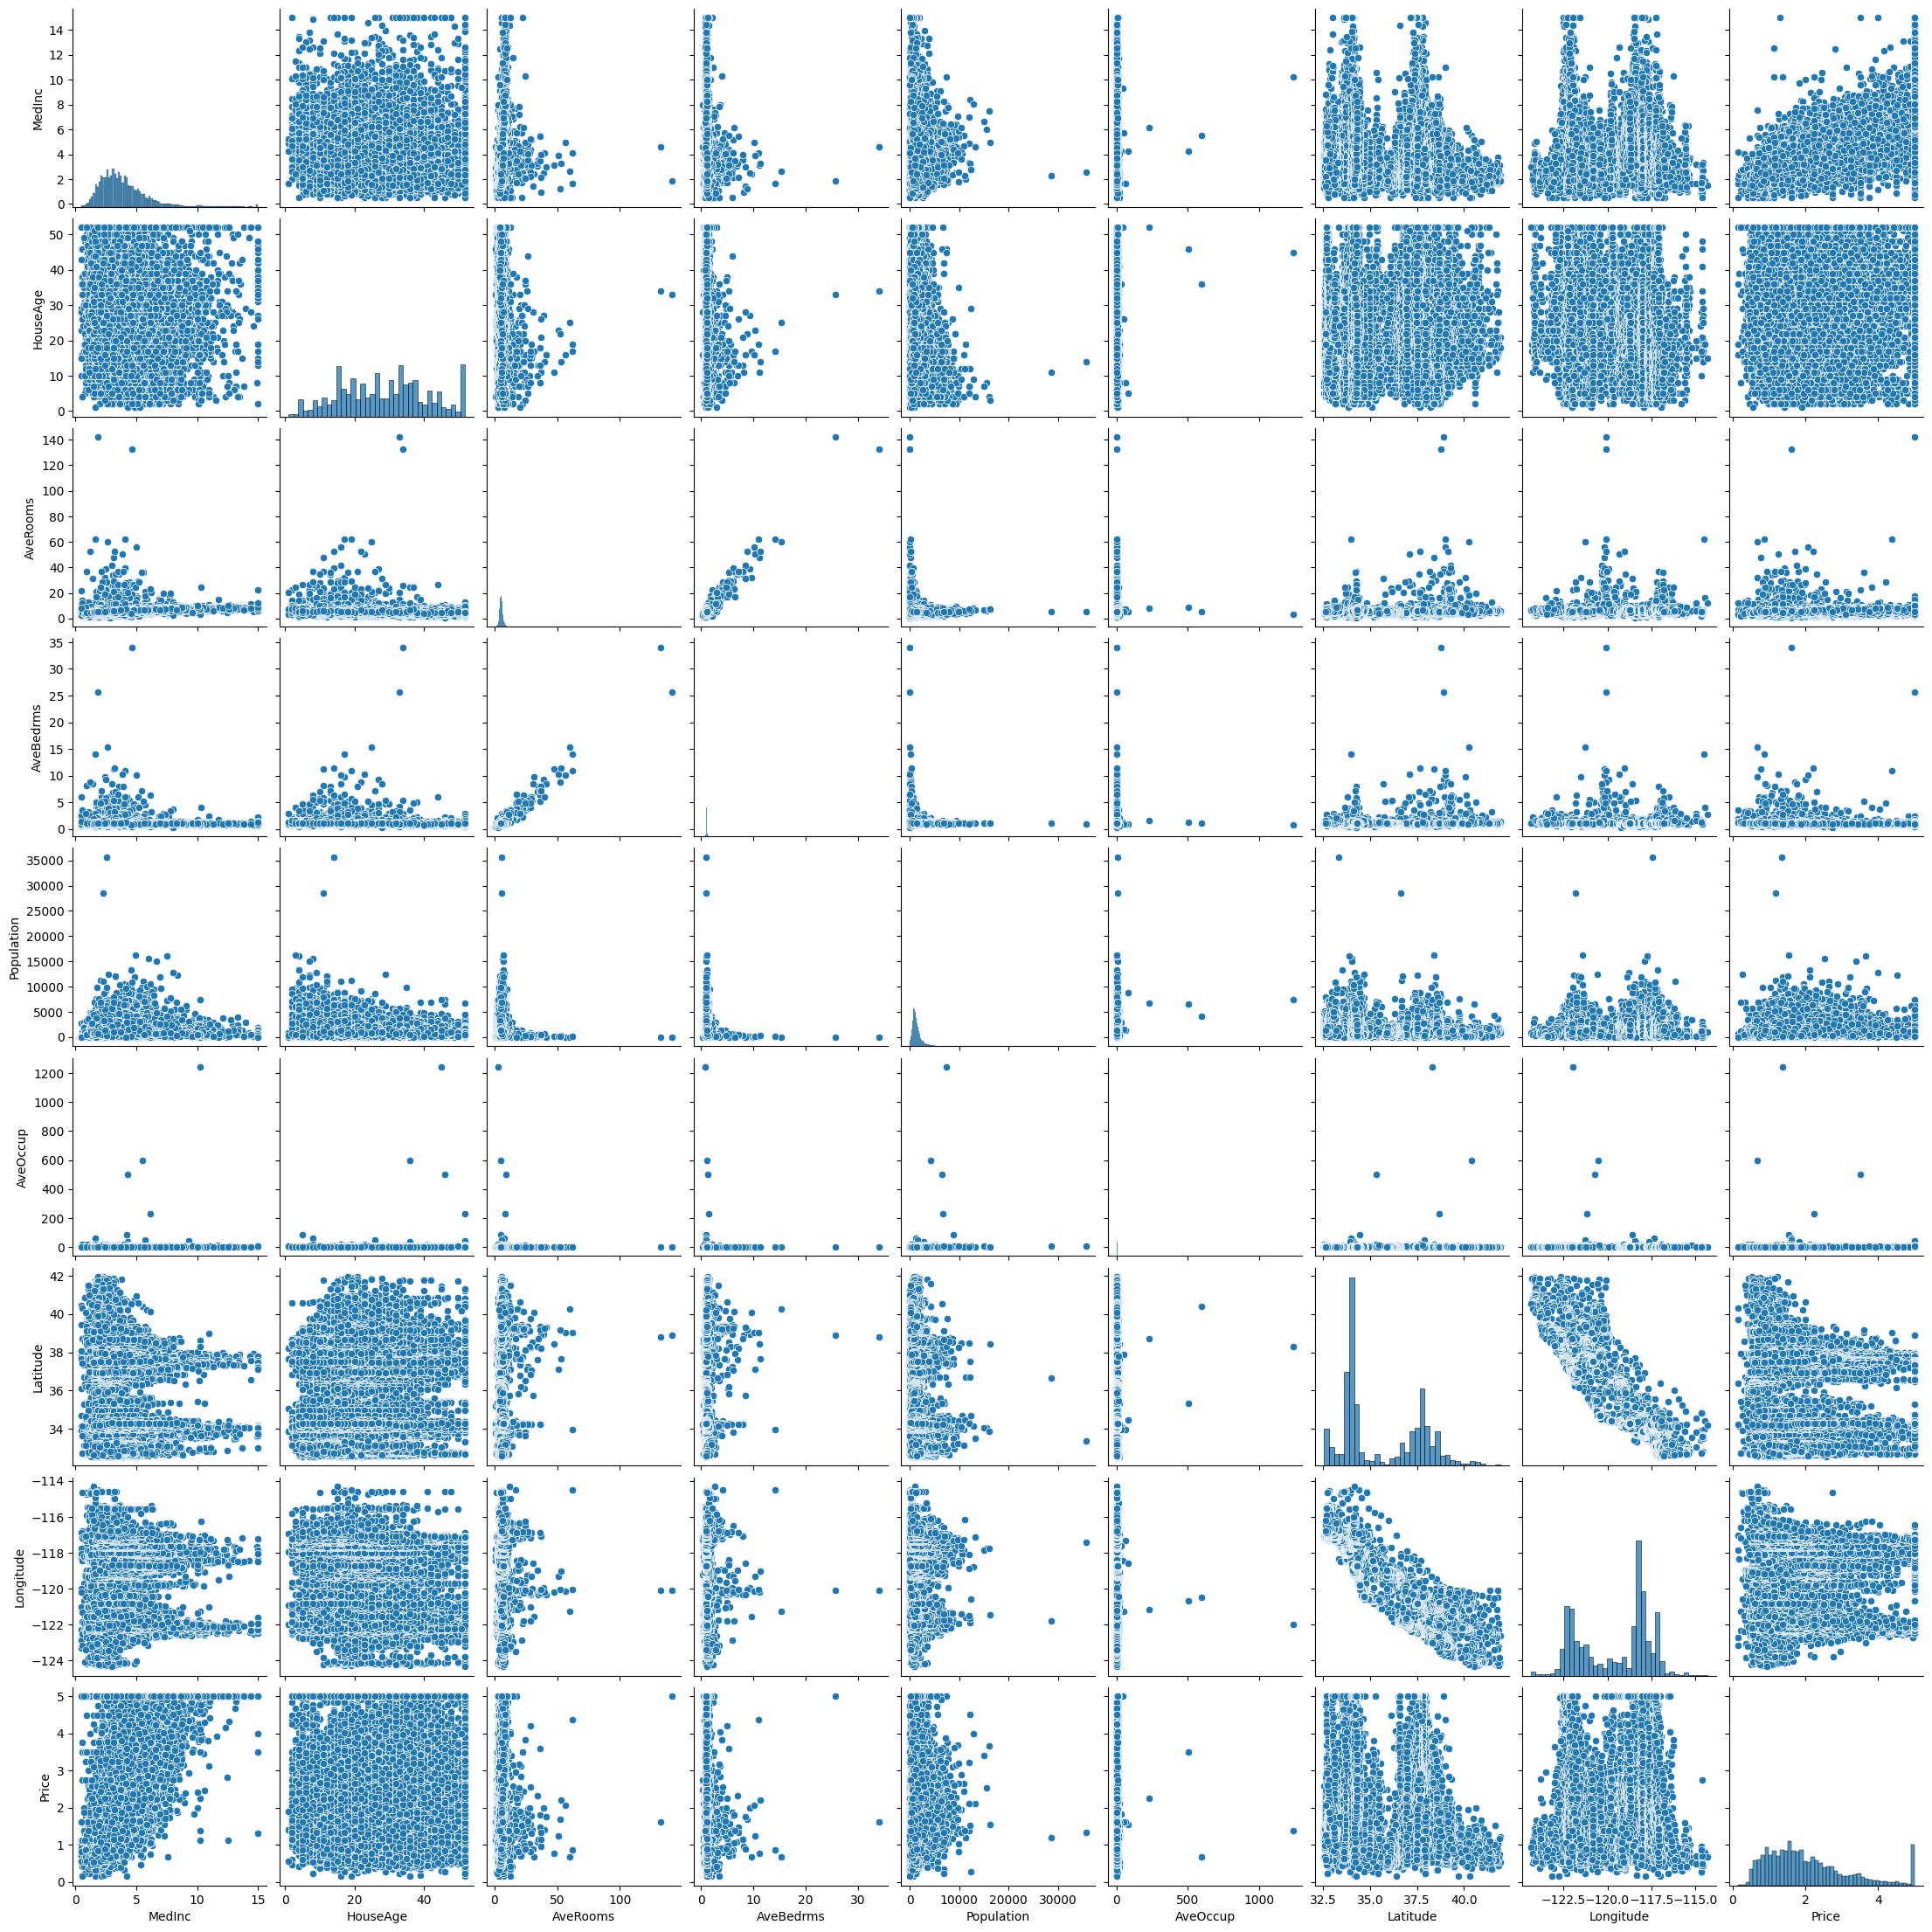

In [15]:
sns.pairplot(data)

C:\Users\Vijay Singh Chouhan\AppData\Local\Temp\ipykernel_17620\2909772490.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col[index]], ax = ax[i][j])
C:\Users\Vijay Singh Chouhan\AppData\Local\Temp\ipykernel_17620\2909772490.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col[

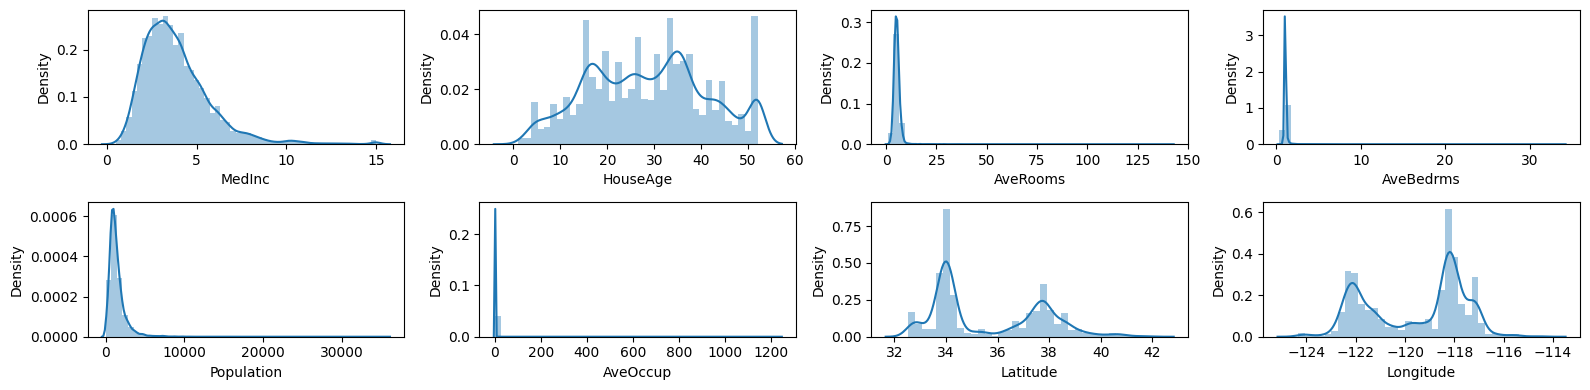

In [16]:
rows = 2
cols = 4

fig , ax = plt.subplots(nrows = rows, ncols = cols , figsize = (16,4))
col = data.columns
index = 0 
for i in range(rows):
    for j in range(cols) :
        sns.distplot(data[col[index]], ax = ax[i][j])
        index = index + 1
plt.tight_layout()

In [17]:
cormat = data.corr()
cormat

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

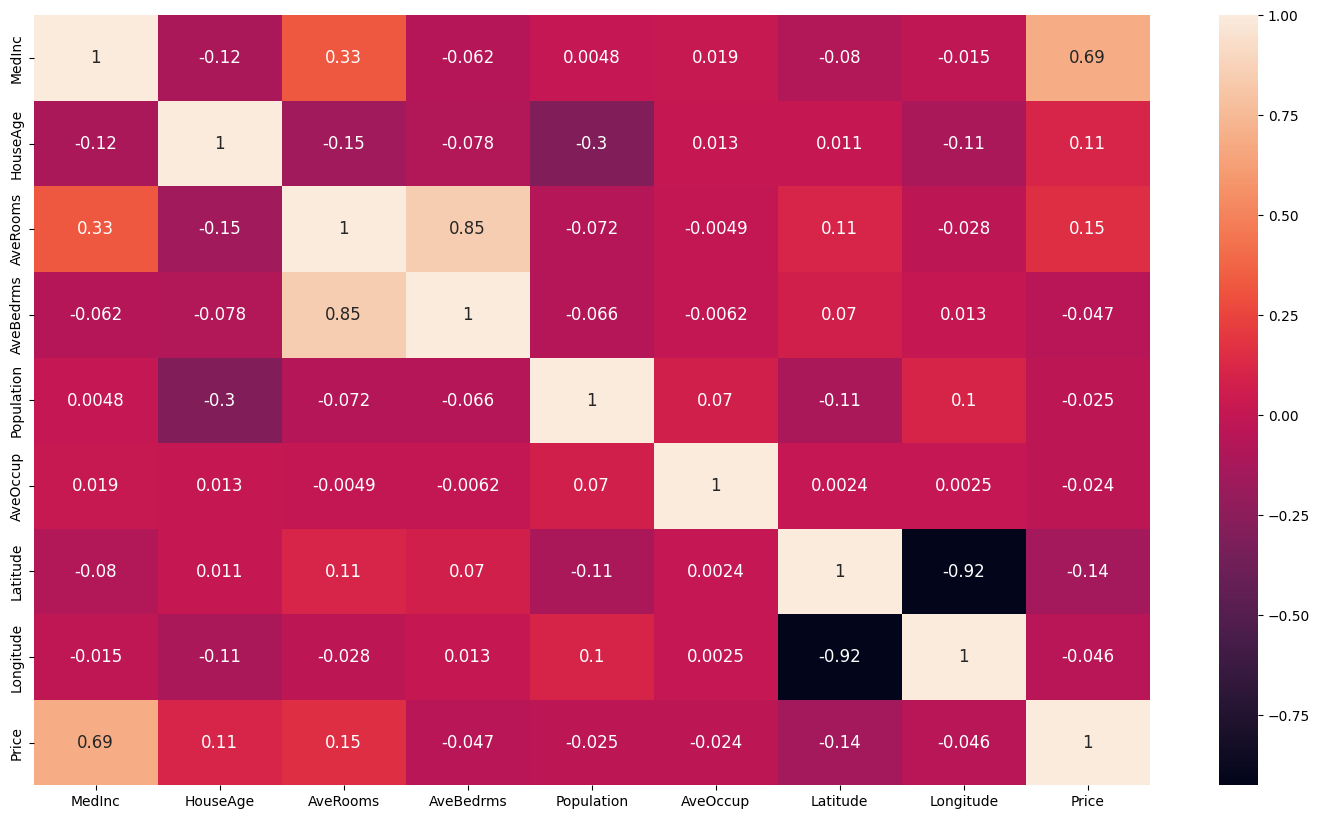

In [18]:
fig , ax = plt.subplots(figsize = (18,10))
sns.heatmap(cormat , annot = True, annot_kws={'size': 12})

In [19]:
def getCorrelatedFeature(corrdata, threshhold):
    feature = []
    value = []

    for i , index in enumerate(corrdata.index):
        if abs(corrdata[index])> threshhold:
            feature.append(index)
            value.append(corrdata[index])

    df = pd.DataFrame(data = value, index = feature, columns=["Corr Value"])
    return df

In [20]:
threshhold = 0.1
corr_value = getCorrelatedFeature(cormat["Price"], threshhold)
corr_value

,Corr Value
MedInc,0.688075
HouseAge,0.105623
AveRooms,0.151948
Latitude,-0.144160
Price,1.000000


In [21]:
corr_value.index.values

array(['MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'Price'],
      dtype=object)

In [22]:
correlated_data = data[corr_value.index]
correlated_data.head()

,MedInc,HouseAge,AveRooms,Latitude,Price
0,8.3252,41.0,6.984127,37.88,4.526
1,8.3014,21.0,6.238137,37.86,3.585
2,7.2574,52.0,8.288136,37.85,3.521
3,5.6431,52.0,5.817352,37.85,3.413
4,3.8462,52.0,6.281853,37.85,3.422


## Pairplot and Cormat of correlated data

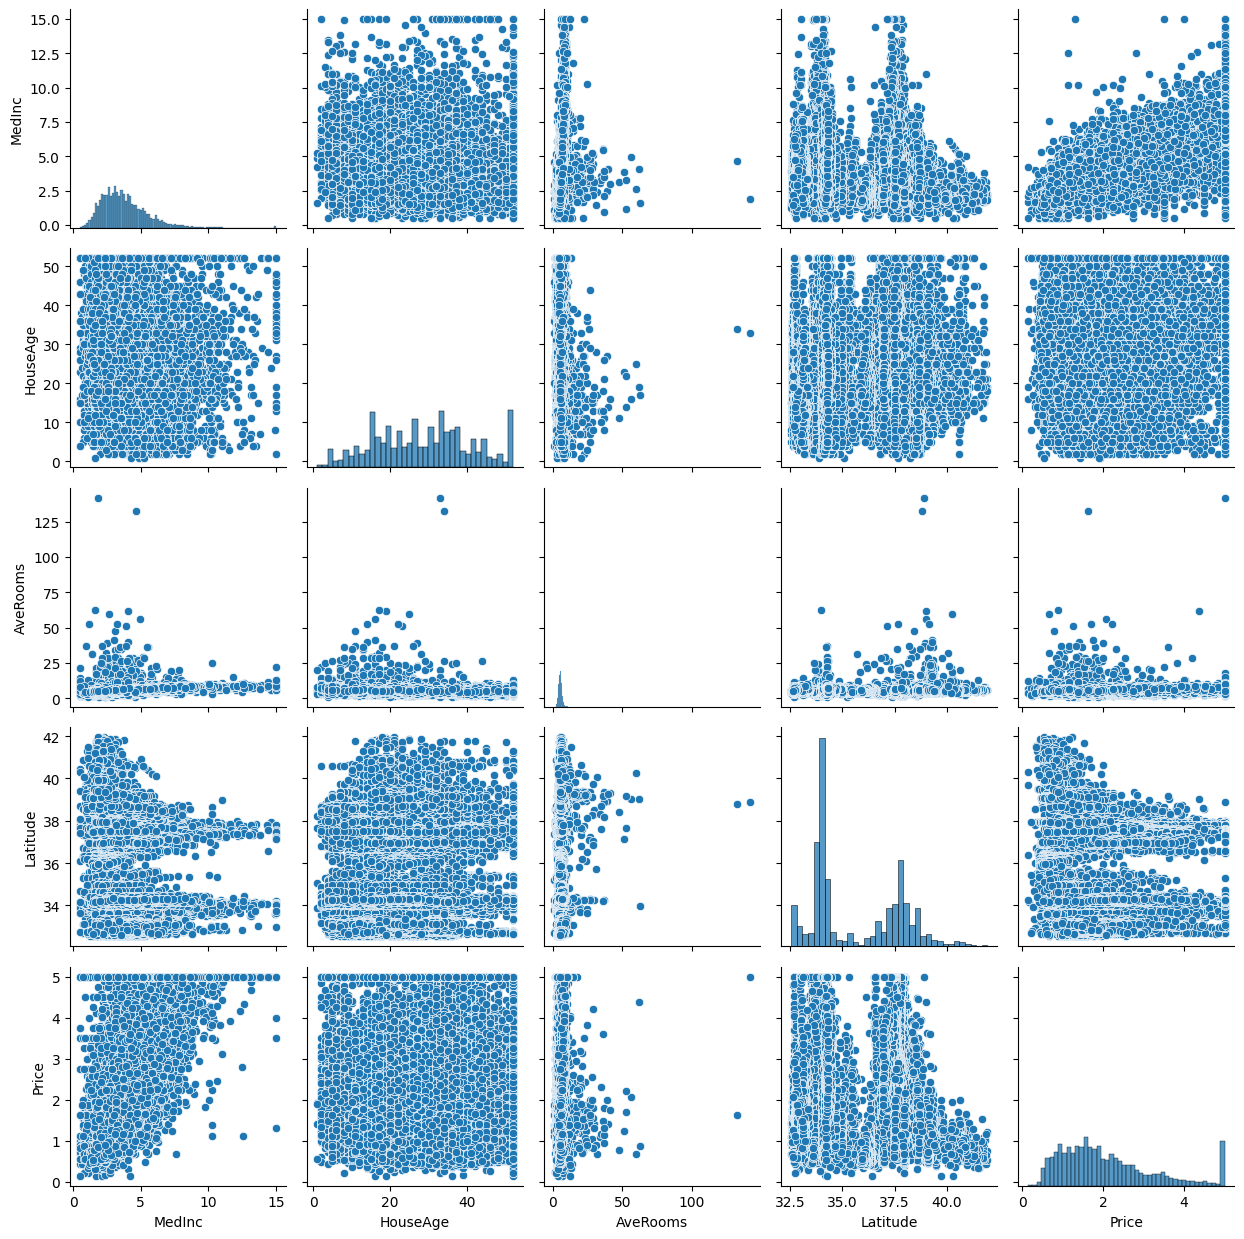

In [23]:
sns.pairplot(correlated_data)
plt.tight_layout()

<Axes: >

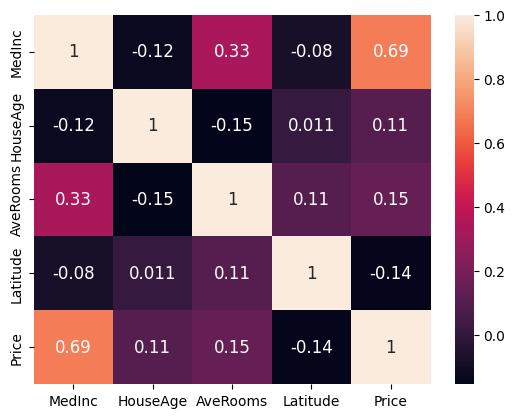

In [24]:
sns.heatmap(correlated_data.corr() , annot = True , annot_kws = {'size':12})

## Shuffle and Split data

In [25]:
X = correlated_data.drop(labels = ["Price"] , axis = 1)
y = correlated_data['Price']
X.head()

,MedInc,HouseAge,AveRooms,Latitude
0,8.3252,41.0,6.984127,37.88
1,8.3014,21.0,6.238137,37.86
2,7.2574,52.0,8.288136,37.85
3,5.6431,52.0,5.817352,37.85
4,3.8462,52.0,6.281853,37.85


In [26]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 0)

In [27]:
X_train.shape , X_test.shape

((16512, 4), (4128, 4))

## Lets train the model 

In [28]:
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [29]:
y_predict = model.predict(X_test)

In [30]:
df = pd.DataFrame(data = [y_predict , y_test])
df.T

,0,1
0,2.212691,1.369
1,3.026070,2.413
2,2.140241,2.007
3,1.708729,0.725
4,2.429224,4.600
...,...,...
4123,1.632748,1.695
4124,2.484596,2.046
4125,1.336233,1.286
4126,2.742509,2.595


In [31]:
from sklearn.metrics import r2_score

In [32]:
score = r2_score(y_test , y_predict)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)

print("r2_score:", score)
print("mae:", mae)
print("mse:",mse)

r2_score: 0.4959273977779416
mae: 0.6039038803504949
mse: 0.6572879407900195


## Strong feature performance

In [33]:
total_features = []
total_features_name = []
selected_correlation_value = []
r2score = []
mae_value = []
mse_value = []

In [34]:
def performance_metrics(features , th , y_true , y_pred):
    score = r2_score(y_true , y_pred)
    mae = mean_absolute_error(y_true , y_pred)
    mse = mean_squared_error(y_true , y_pred)

    total_features.append(len(features)-1)
    total_features_name.append(str(features))
    selected_correlation_value.append(th)
    r2score.append(score)
    mae_value.append(mae)
    mse_value.append(mse)

    metrics_dataframe = pd.DataFrame(data =[total_features_name,total_features,selected_correlation_value,r2score,mae_value,mse_value],
                                     index = ['features_name','features','corr_value', 'r2score', 'MAE', 'MSE'])
    return metrics_dataframe.T

In [35]:
performance_metrics(correlated_data.columns.values, threshhold, y_test, y_predict)

,features_name,features,corr_value,r2score,MAE,MSE
0,['MedInc' 'HouseAge' 'AveRooms' 'Latitude' 'Pr...,4,0.1,0.495927,0.603904,0.657288


## regression plot of the features correlated with House Price

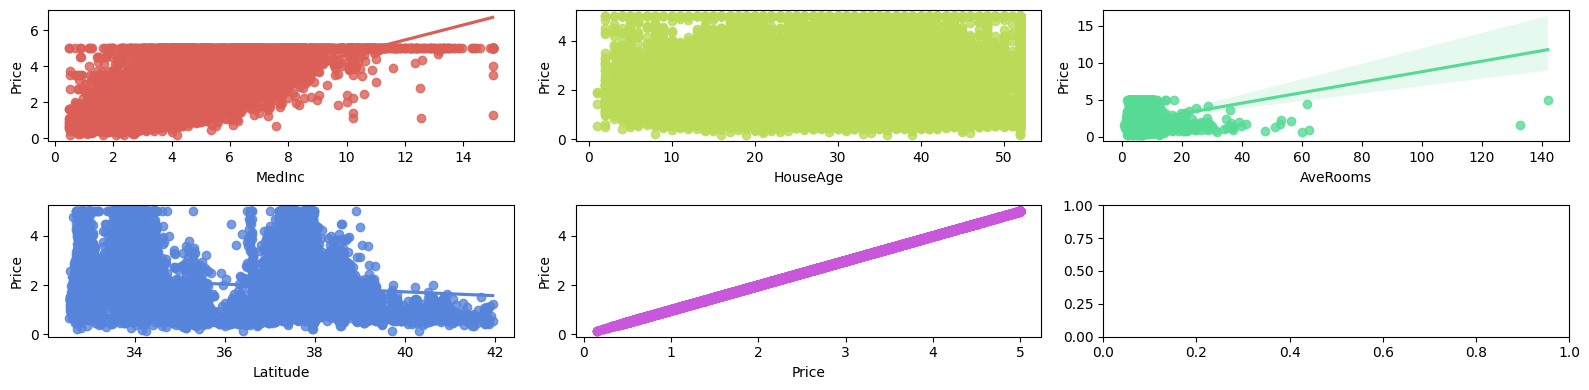

In [36]:
from seaborn import color_palette
rows = 2
cols = 3
fig , ax = plt.subplots(nrows = rows, ncols=cols, figsize = (16,4))

col = correlated_data.columns
index = 0
palette = color_palette("hls", 5)
for i in range(rows):
    for j in range(cols):
        if index == len(correlated_data.columns):
            break
        sns.regplot(x= correlated_data[col[index]], y = correlated_data['Price'], ax = ax[i][j],color=palette[index])
        index= index + 1

fig.tight_layout()

### lets find out other combination of columns to get better accuracy with > 15 %

In [37]:
cormat["Price"]

MedInc        0.688075
HouseAge      0.105623
AveRooms      0.151948
AveBedrms    -0.046701
Population   -0.024650
AveOccup     -0.023737
Latitude     -0.144160
Longitude    -0.045967
Price         1.000000
Name: Price, dtype: float64

In [38]:
threshhold = 0.15
corr_value = getCorrelatedFeature(cormat["Price"], threshhold)
corr_value

,Corr Value
MedInc,0.688075
AveRooms,0.151948
Price,1.000000


In [39]:
correlated_data = data[corr_value.index]
correlated_data.head()

,MedInc,AveRooms,Price
0,8.3252,6.984127,4.526
1,8.3014,6.238137,3.585
2,7.2574,8.288136,3.521
3,5.6431,5.817352,3.413
4,3.8462,6.281853,3.422


In [40]:
def get_y_predict(corrdata):
    X = corrdata.drop(labels = ["Price"] , axis = 1)
    y = corrdata['Price']

    X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 0)
    model = LinearRegression()
    model.fit(X_train , y_train)
    y_predict = model.predict(X_test)
    return y_predict

In [41]:
y_predict = get_y_predict(correlated_data)


In [42]:
performance_metrics(correlated_data.columns.values, threshhold , y_test , y_predict)

,features_name,features,corr_value,r2score,MAE,MSE
0,['MedInc' 'HouseAge' 'AveRooms' 'Latitude' 'Pr...,4,0.1,0.495927,0.603904,0.657288
1,['MedInc' 'AveRooms' 'Price'],2,0.15,0.455355,0.629643,0.710193


### Lets's find out other combination of columns to get better accuracy > 60%

In [43]:
cormat["Price"]

MedInc        0.688075
HouseAge      0.105623
AveRooms      0.151948
AveBedrms    -0.046701
Population   -0.024650
AveOccup     -0.023737
Latitude     -0.144160
Longitude    -0.045967
Price         1.000000
Name: Price, dtype: float64

In [44]:
threshhold = 0.60
corr_value = getCorrelatedFeature(cormat['Price'], threshhold)
corr_value

,Corr Value
MedInc,0.688075
Price,1.000000


In [45]:
correlated_data = data[corr_value.index]
correlated_data.head()

,MedInc,Price
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,5.6431,3.413
4,3.8462,3.422


In [46]:
y_predict = get_y_predict(correlated_data)
performance_metrics(correlated_data.columns.values, threshhold, y_test , y_predict)

,features_name,features,corr_value,r2score,MAE,MSE
0,['MedInc' 'HouseAge' 'AveRooms' 'Latitude' 'Pr...,4,0.1,0.495927,0.603904,0.657288
1,['MedInc' 'AveRooms' 'Price'],2,0.15,0.455355,0.629643,0.710193
2,['MedInc' 'Price'],1,0.6,0.446685,0.635213,0.721498


### Now lets see for AveRooms

In [48]:
correlated_data = data[['AveRooms', 'Price']]
correlated_data.head()

,AveRooms,Price
0,6.984127,4.526
1,6.238137,3.585
2,8.288136,3.521
3,5.817352,3.413
4,6.281853,3.422


In [49]:
y_predict = get_y_predict(correlated_data)
performance_metrics(correlated_data.columns.values, threshhold , y_test , y_predict)

,features_name,features,corr_value,r2score,MAE,MSE
0,['MedInc' 'HouseAge' 'AveRooms' 'Latitude' 'Pr...,4,0.1,0.495927,0.603904,0.657288
1,['MedInc' 'AveRooms' 'Price'],2,0.15,0.455355,0.629643,0.710193
2,['MedInc' 'Price'],1,0.6,0.446685,0.635213,0.721498
3,['AveRooms' 'Price'],1,0.6,0.446685,0.635213,0.721498
4,['AveRooms' 'Price'],1,0.6,0.019687,0.893668,1.278284


### Plotting learning curve 

In [51]:
from sklearn.model_selection import learning_curve , ShuffleSplit

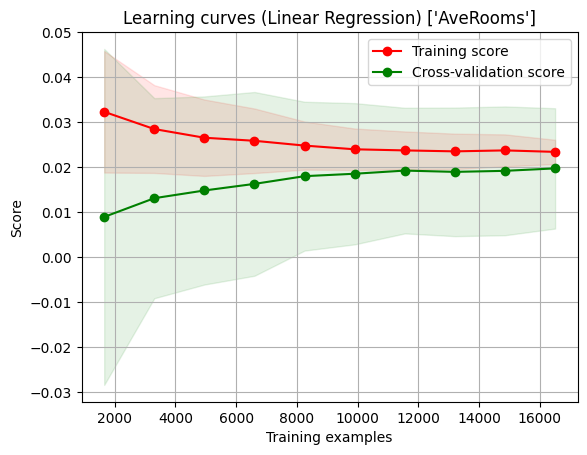

In [53]:
def plot_learning_curve(estimator , title ,X,y, ylim = None,cv= None,n_jobs= None, train_sizes = np.linspace(.1,1.0,10)):


    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes,train_scores,test_scores = learning_curve(estimator,X,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)

    plt.grid()

    plt.fill_between(train_sizes , train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha = 0.1, color = "r")
    plt.fill_between(train_sizes , test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color = "g")
    plt.plot(train_sizes,train_scores_mean, "o-", color = "r", label = "Training score")
    plt.plot(train_sizes,test_scores_mean, "o-", color = "g", label = "Cross-validation score")

    plt.legend(loc = "best")
    return plt


X = correlated_data.drop(labels = ["Price"], axis = 1)
y = correlated_data["Price"]

title = "Learning curves (Linear Regression) " + str(X.columns.values)

cv = ShuffleSplit(n_splits =100, test_size = 0.2, random_state = 0)

estimator = LinearRegression()
plot_learning_curve(estimator, title, X ,y, ylim= (0.7, 1.01) , cv=cv , n_jobs = -1)

plt.show()